##Tarea 2: Análisis de datos
###Profesores: Pedro Arturo Flores Silva, Karen Rubí Jiménez López
###Alumno: Marco Loreto Silva


En esta tarea realizarás un análisis (como el visto en clase) de un conjunto de datos (dataset) de tu elección.
El dataset lo puedes conseguir en el link adjunto.

La idea es que plantees hipótesis y/o preguntas que deberás responder a través de tu análisis. Dichas hipótesis/preguntas/ideas/pensamientos debes anotarlas en celdas tipo markdown.

Restricciones:
- Mínimo 3 gráficas e interpretarlas
-Mínimo 2 Tablas e interpretarlas
- Máximo 7 ejercicios en total 
- Documentar el código
- Procura que tus ideas/hipótesis/preguntas sean claras 
- Subir código y dataset al github. Responder con usuario (mismo procedimiento que la tarea anterior)
- Elegir datasets que sean tipo tabular

Partiendo de dos dataframes que contienen la información sobre las propiedades distintos provenientes de Portugal, siendo estos variantes del vino 'Vinho Verde'. En estos dataframes, tenemos algunas de las características de los vinos, como su ph, densidad, porcentaje de alcohol, y calidad en escala del 1 al 10.

Buscaremos ver la relación de la calidad de los vinos con sus propiedades, tales como su porcentaje de alcohol, las distribuciones de sus calificaciones y ver sus diferencias entre el vino blanco y rojo para determinar su algunas de sus propiedades influyen mas que otras en su calidad. Para responder preguntas como, ¿Qué vinos son mejor calificados?, ¿Qué parametros en sus propiedades los hacen tener una calificación mayor o menor? y ¿Cómo podemos identificar un vino bueno o malo?, según sus caracteristicas propias y compartidas.

In [1]:
from google.colab import drive                          #Como trabajamos en Colaboratory, 
drive.mount("./drive", force_remount=True)              #comenzamos montando en el drive

Mounted at ./drive


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import re
from os.path import join                  #importamos las librerias que ocuparemos
import pandas as pd
import csv
import seaborn as sns


%matplotlib inline

#Ruta de nuestros dataframes
path = "./drive/My Drive/"                


In [4]:
#Nombres de los archivos
rojo = 'winequality-red.csv'                
blanco = 'winequality-white.csv'

 #Cargamos los archivos deparando por comas
df_rojo =  pd.read_csv(join(path, rojo),sep=';')             
df_blanco =  pd.read_csv(join(path, blanco),sep=';') 

#Copias de los archivos para poder modificarlos sin alterar los originales
dfrojo_c = df_rojo.copy()                    
dfblanco_c = df_blanco.copy() 


In [5]:
#Comenzamos por ver las caracteristicas del data frame
dfrojo_c.info()           

#Mismo caso para el blanco
dfblanco_c.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column        

In [6]:
print('El valor máximo de calidad de los vinos rojos es:',dfrojo_c['quality'].max(), 'y el valor minimo en la calidad de los vinos rojoe es:', dfrojo_c['quality'].min())
print('El valor máximo de calidad de los vinos blancos es:',dfblanco_c['quality'].max(), 'y el valor minimo en la calidad de los vinos blancos es:', dfblanco_c['quality'].min())

El valor máximo de calidad de los vinos rojos es: 8 y el valor minimo en la calidad de los vinos rojoe es: 3
El valor máximo de calidad de los vinos blancos es: 9 y el valor minimo en la calidad de los vinos blancos es: 3


###1.- Sabiendo los valores más bajos y altos para ambos vinos en cuanto a su calidad, hacemos un gráfico de pasteles para observar, las proporciones de estas cantidades. 

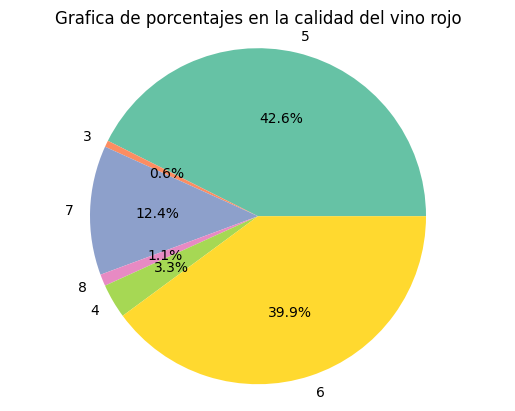

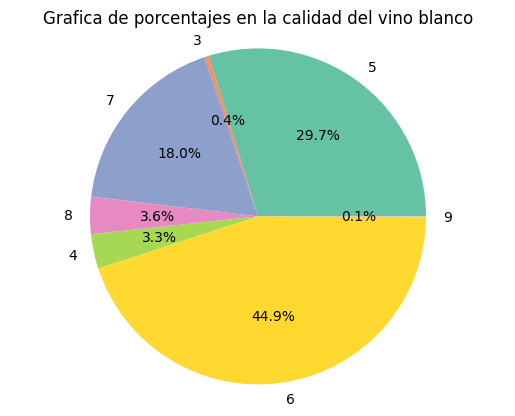

In [7]:
#Vino rojo

#Orden en el cual queremos que se muestre la gráfica
order_r = [5,3,7,8,4,6]        

 #Las etiquetas para que coincidan con el orden
labels_r= list(map(str,order_r))     

#Contamos los valores en la columna de quality
counts_r = dfrojo_c['quality'].value_counts()     

#Ordenamos por los valores contados
counts_r_ordered = counts_r.loc[order_r]          

#Especificaciones de la gráfica
plt.pie(counts_r_ordered, labels=labels_r, autopct='%1.1f%%',colors=sns.color_palette('Set2'))    

#Titulo de la gráfica    
plt.title('Grafica de porcentajes en la calidad del vino rojo')                                       
plt.axis('equal')

 #Graficación
plt.show()


#Vino blanco


#Orden en el cual queremos que se muestre la gráfica
order_b = [5,3,7,8,4,6,9]             

#Las etiquetas para que coincidan con el orden
labels_b= list(map(str,order_b))      

#Contamos los valores en la columna de quality
counts_b = dfblanco_c['quality'].value_counts()    

#Ordenamos por los valores contados
counts_b_ordered = counts_b.loc[order_b]              

#Especificaciones de la gráfica
plt.pie(counts_b_ordered, labels=labels_b, autopct='%1.1f%%',colors=sns.color_palette('Set2'))   

#Titulo de la gráfica
plt.title('Grafica de porcentajes en la calidad del vino blanco')                                         
plt.axis('equal')

#Graficación
plt.show()  

###2.-Ahora veremos mediante un histograma, como es que estan repartidas sus calificaciones entre los vinos.

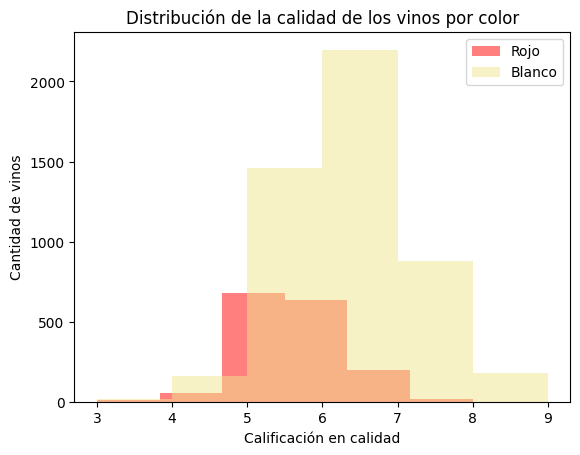

In [19]:
vino_rojo = dfrojo_c
vino_blanco = dfblanco_c

# Gráfico de histograma del valor de la calidad para los vinos rojos
plt.hist(vino_rojo['quality'], bins=6, alpha=0.5, label='Rojo', color='red')

# Gráfico de histograma del valor de la calidad para los vinos blancos
plt.hist(vino_blanco['quality'], bins=6, alpha=0.5, label='Blanco', color='khaki')

# Aggregamos el título y los nombres de los ejes
plt.title('Distribución de la calidad de los vinos por color')
plt.xlabel('Calificación en calidad')
plt.ylabel('Cantidad de vinos')

# Agregamos leyenda
plt.legend()

# Mostramos el gráfico
plt.show()

Del histograma, podemos ver que la cantidad de información en los vinos blancos es mayor y como estos tienen mejores calificaciónes que los rojos, concentrandose entre la calificación de 6 y 7, contra las de los vinos tintos, que se concentran entre el 5 y 6 de calificación.

Esto nos puede comenzar a orientar a que los vinos blancos tinden a recibir calificaciones más altas que los tintos.

###3.- De las gráficas pasadas podemos observar como la mayoría de las calificaciones de ambos vinos recae fuertemente en los valores de 5 o 6, mientras que los valores más altos y más bajos son la notable minoría. Ahora, podemos enfocarnos en buscar los factores que determinan la calidad de los vinos con las mejores calificaciones.

Para esto hacemos la siguiente tabla, seccionando los vinos con las calidades más altas y con las calidades más bajas.

In [8]:
dfrojo_c.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [9]:
dfblanco_c.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


###4.- Con el fin de ver el comportamiento de los valores de los vinos con mayor y menor calidad para el rojo y blanco, realizamos los siguientes graficos.

In [10]:
#Hacemos agrupamientos de los fataframes en función de sus valores en calidad

#Para el vino rojo
grupo_r = dfrojo_c.groupby('quality')        

#Creamos un diccionario del dataframe donde cada llave es el calor en la columna de calidad 
dicc_r = {name: group.copy() for name, group in grupo_r}

#Para el vino blanco
grupo_b = dfblanco_c.groupby('quality')

#Creamos un diccionario del dataframe donde cada llave es el calor en la columna de calidad 
dicc_b = {name: group.copy() for name, group in grupo_b}



In [11]:
#Nombres de las columnas
col_names = dfrojo_c.columns.values

#De esta manera hacemos las listas con los nombres mas grandes
col_nombres_3 = [value for value in col_names for i in range(3)]

#Mismo caso para los valores de minimo, promedio y máximo
valor = ['min', 'prom', 'max']

valores = valor * 12

In [12]:
#Lista vacia donde vamos a guardar los valores de minimo, 
#promedio y máximo para los vinos rojos de menor calidad 
val_r_3 =[]

#for i in dicc_r: 
for j in col_names:
  val_r_3.append(dicc_r[3][j].min())
  val_r_3.append(dicc_r[3][j].mean())
  val_r_3.append(dicc_r[3][j].max())

#Lista vacia donde vamos a guardar los valores de minimo, 
#promedio y máximo para los vinos rojos de ayor calidad 
val_r_8 =[]

#for i in dicc_r: 
for j in col_names:
  val_r_8.append(dicc_r[8][j].min())
  val_r_8.append(dicc_r[8][j].mean())
  val_r_8.append(dicc_r[8][j].max())
    


In [13]:
#Diccionario donde guardamos los valores de cada 
dict_r_3 ={'col':col_nombres_3, 'tipo':valores, 'num':val_r_3}
df_r_3 = pd.DataFrame(dict_r_3)

dict_r_8 ={'col':col_nombres_3, 'tipo':valores, 'num':val_r_8}
df_r_8 = pd.DataFrame(dict_r_8)

<ipython-input-14-b54d1b1f2547>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='col', y='num', hue='tipo', data=df_r_3,ci=None, palette="deep")
<ipython-input-14-b54d1b1f2547>:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax =sns.barplot(x='col', y='num', hue='tipo', data=df_r_8,ci=None, palette="deep")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'fixed acidity'),
  Text(1, 0, 'volatile acidity'),
  Text(2, 0, 'citric acid'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free sulfur dioxide'),
  Text(6, 0, 'total sulfur dioxide'),
  Text(7, 0, 'density'),
  Text(8, 0, 'pH'),
  Text(9, 0, 'sulphates'),
  Text(10, 0, 'alcohol'),
  Text(11, 0, 'quality')])

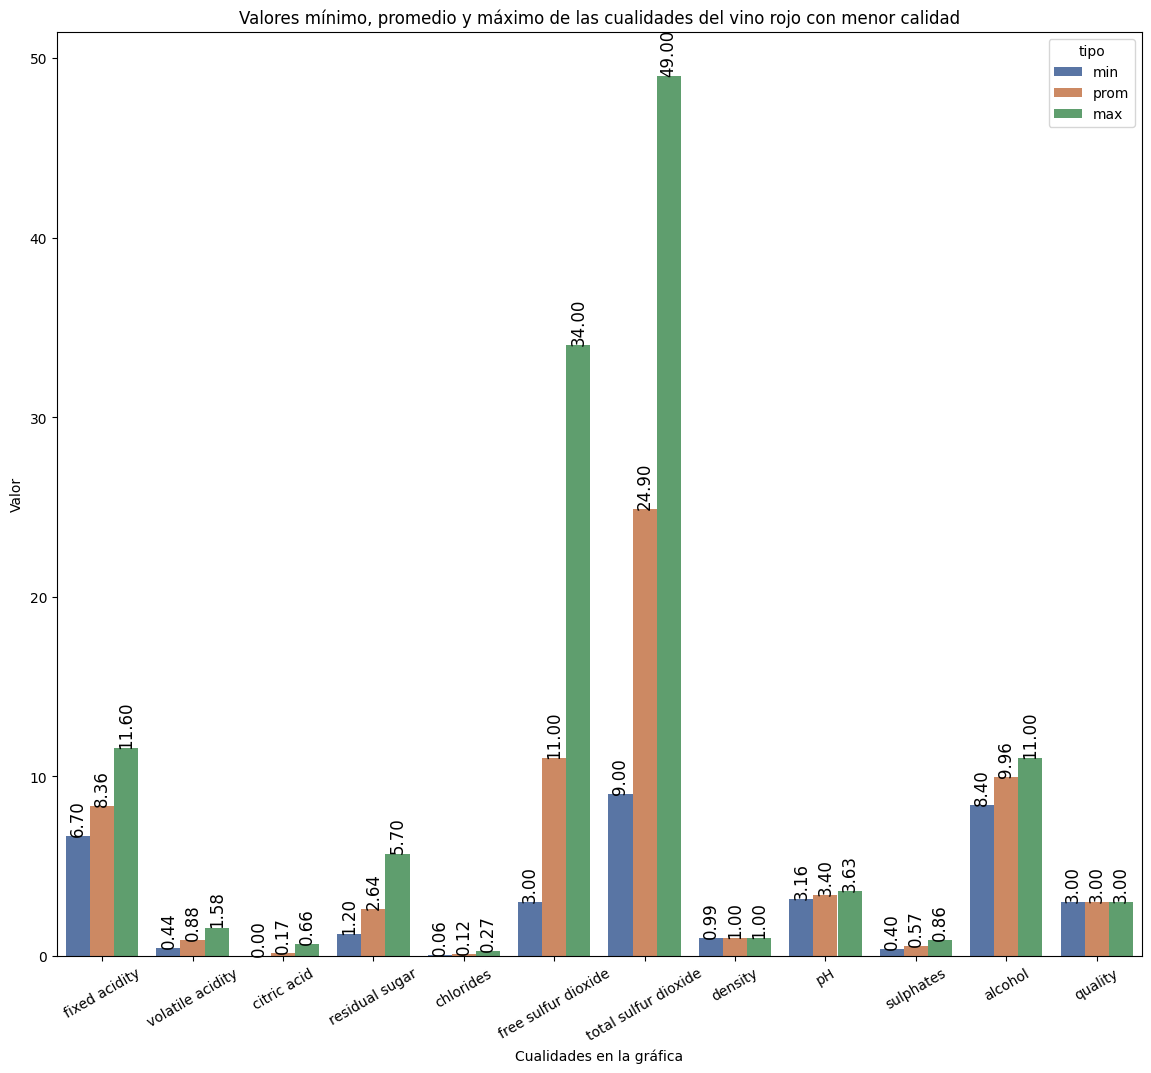

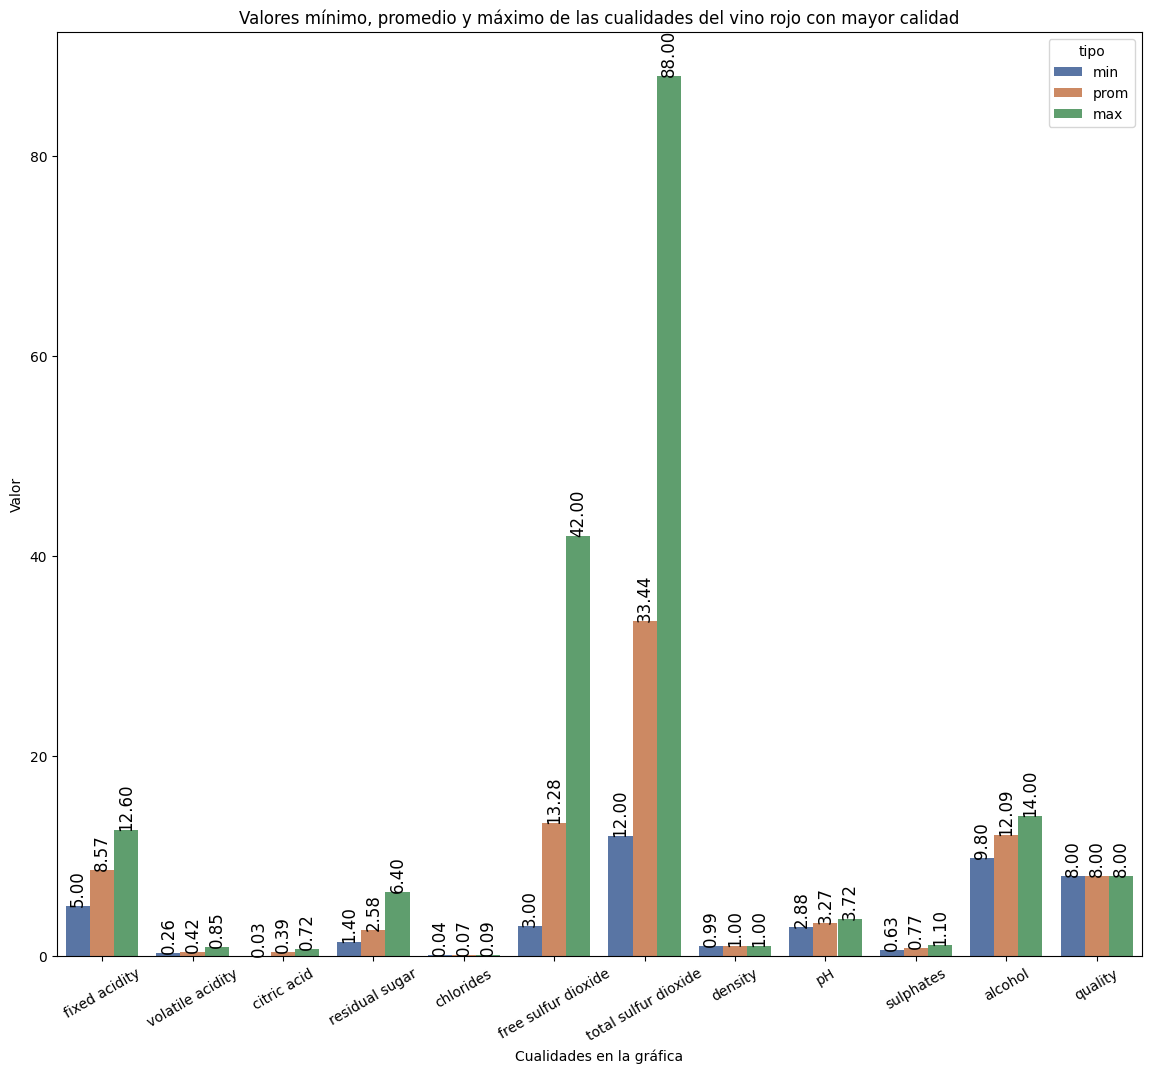

In [14]:
#Graficas de barras donde podemos ver los valores mas bajas, promedio y máximos 
#en los vinos rojos con menor calidad y los vinos rojos con mayor calidad

#Para los vinos rojos de menor calidad

#Fijamos el tamaño
plt.figure(figsize=(14,12))        

#Vamos a graficar en
ax = sns.barplot(x='col', y='num', hue='tipo', data=df_r_3,ci=None, palette="deep")    

#Especificaciones sobre la gráfica
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.2f}'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom', rotation=90)

#Título
plt.title('Valores mínimo, promedio y máximo de las cualidades del vino rojo con menor calidad')     

#Titulo de los ejes
plt.xlabel('Cualidades en la gráfica')           
plt.ylabel('Valor')

#Rotaos las etiquetas del eje x
plt.xticks(rotation=30)                 


#Para los vinos rojos de mayor calidad


#Fijamos el tamaño
plt.figure(figsize=(14,12))        

#Vamos a graficar en
ax =sns.barplot(x='col', y='num', hue='tipo', data=df_r_8,ci=None, palette="deep")    

#Especificaciones sobre la gráfica
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.2f}'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom', rotation=90)

#Título
plt.title('Valores mínimo, promedio y máximo de las cualidades del vino rojo con mayor calidad')     

#Titulo de los ejes
plt.xlabel('Cualidades en la gráfica')           
plt.ylabel('Valor')

#Rotaos las etiquetas del eje x
plt.xticks(rotation=30)                

Para el vino rojo, tenemos de estas graficas, que los vinos de menor calidad, tienen en promedio un nivel de alcohol menor, al igual que para los valores de dioxido de sulfuro total y libre, siendo estas tres caracteristicas, las que más varian en los resultados de la calidad en el vino rojo.

Seguido del ph que presenta una ligera variación en el promedio de sus valores, podemos ver en las graficas, que las otras caracteristicas no son tan determinantes en cuanto a la calidad del vino.

Ahora, realizamos el mismo análisis para los valores del vino blanco, analizando los valores con la calficacción mas baja y la más alta.

In [15]:
#Lista vacia donde vamos a guardar los valores de minimo, 
#promedio y máximo para los vinos blancos de menor calidad 
val_b_3 =[]

#for i in dicc_r: 
for j in col_names:
  val_b_3.append(dicc_b[3][j].min())
  val_b_3.append(dicc_b[3][j].mean())
  val_b_3.append(dicc_b[3][j].max())

#Lista vacia donde vamos a guardar los valores de minimo, 
#promedio y máximo para los vinos blancos de mayor calidad 
val_b_9 =[]

#for i in dicc_r: 
for j in col_names:
  val_b_9.append(dicc_b[9][j].min())
  val_b_9.append(dicc_b[9][j].mean())
  val_b_9.append(dicc_b[9][j].max())

In [16]:
#Diccionario donde guardamos los valores de cada 
dict_b_3 ={'col':col_nombres_3, 'tipo':valores, 'num':val_b_3}
df_b_3 = pd.DataFrame(dict_b_3)

dict_b_9 ={'col':col_nombres_3, 'tipo':valores, 'num':val_b_9}
df_b_9 = pd.DataFrame(dict_b_9)

<ipython-input-17-9fc68b259e9f>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x='col', y='num', hue='tipo', data=df_b_3,ci=None,  palette="rocket")
<ipython-input-17-9fc68b259e9f>:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax =sns.barplot(x='col', y='num', hue='tipo', data=df_b_9,ci=None, palette="rocket")


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'fixed acidity'),
  Text(1, 0, 'volatile acidity'),
  Text(2, 0, 'citric acid'),
  Text(3, 0, 'residual sugar'),
  Text(4, 0, 'chlorides'),
  Text(5, 0, 'free sulfur dioxide'),
  Text(6, 0, 'total sulfur dioxide'),
  Text(7, 0, 'density'),
  Text(8, 0, 'pH'),
  Text(9, 0, 'sulphates'),
  Text(10, 0, 'alcohol'),
  Text(11, 0, 'quality')])

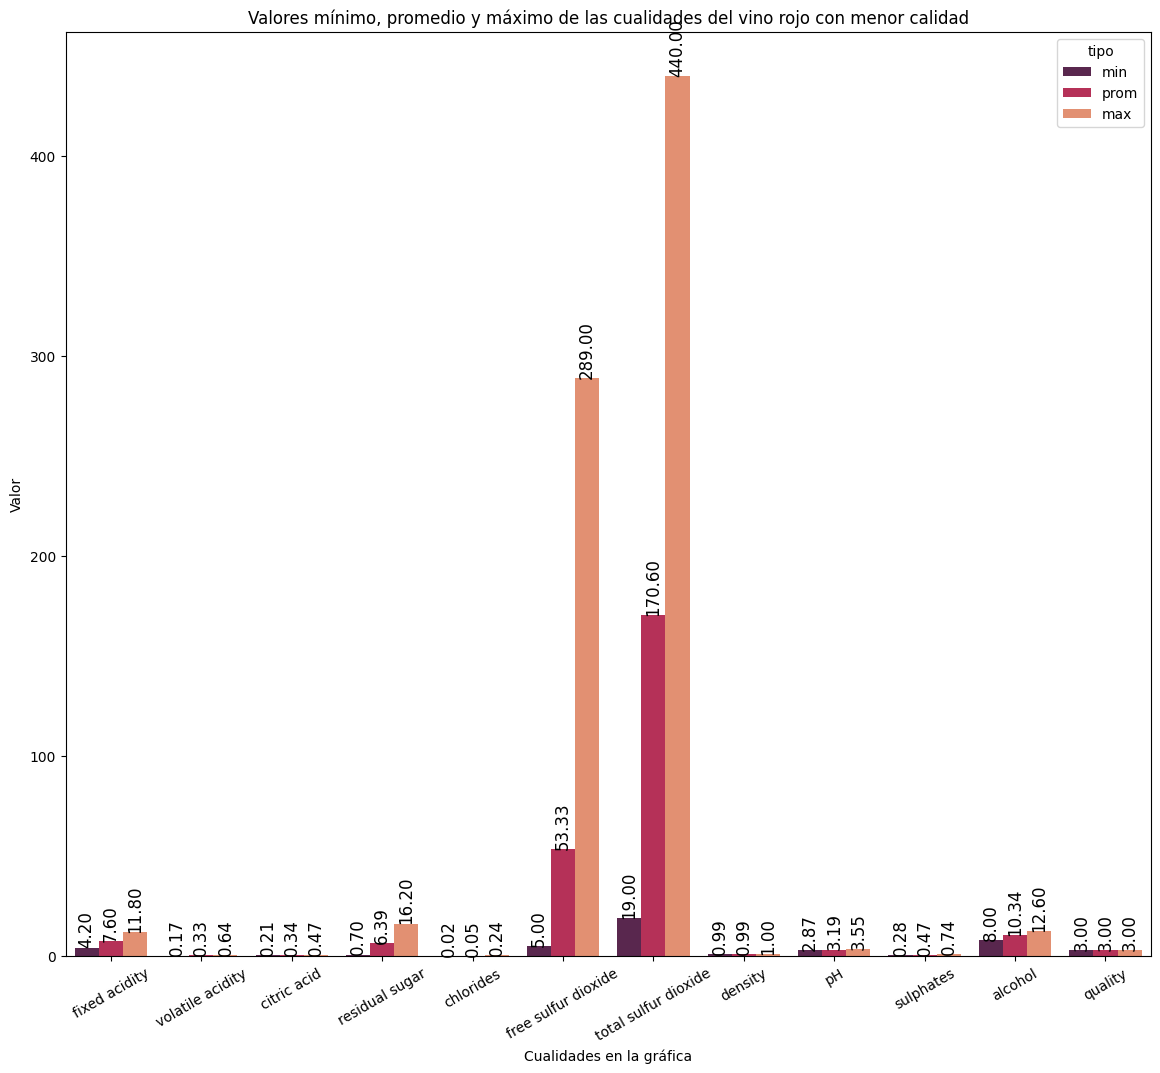

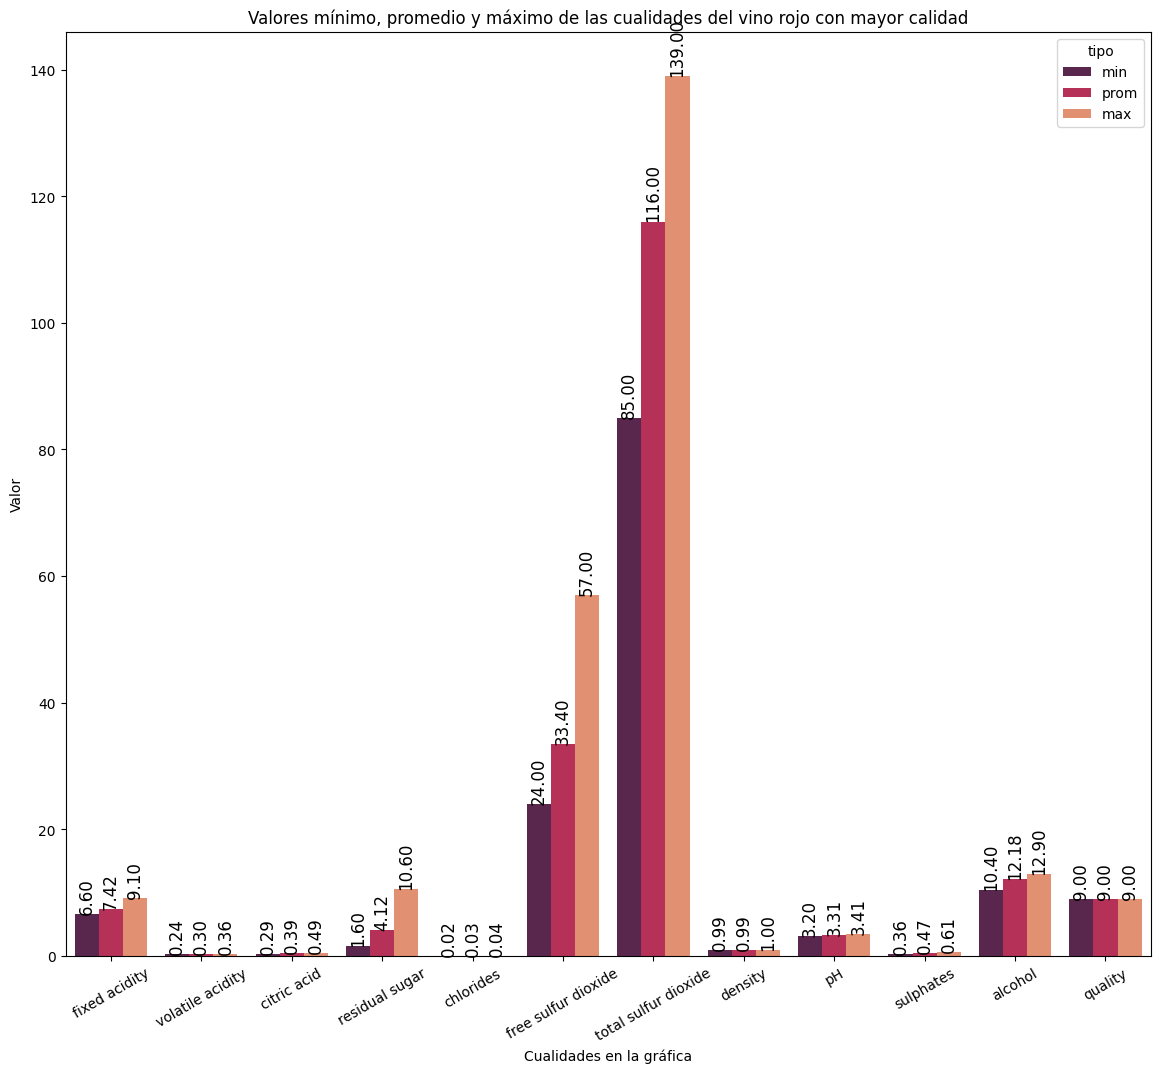

In [17]:
#Graficas de barras donde podemos ver los valores mas bajas, promedio y máximos 
#en los vinos blancos con menor calidad y los vinos rojos con mayor calidad

#Para los vinos blancos de menor calidad

#Fijamos el tamaño
plt.figure(figsize=(14,12))        

#Vamos a graficar en
ax = sns.barplot(x='col', y='num', hue='tipo', data=df_b_3,ci=None,  palette="rocket")    

#Especificaciones sobre la gráfica
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.2f}'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom', rotation=90)

#Título
plt.title('Valores mínimo, promedio y máximo de las cualidades del vino rojo con menor calidad')     

#Titulo de los ejes
plt.xlabel('Cualidades en la gráfica')           
plt.ylabel('Valor')

#Rotaos las etiquetas del eje x
plt.xticks(rotation=30)                 


#Para los vinos blancos de mayor calidad



#Fijamos el tamaño
plt.figure(figsize=(14,12))        

#Vamos a graficar en
ax =sns.barplot(x='col', y='num', hue='tipo', data=df_b_9,ci=None, palette="rocket")    

#Especificaciones sobre la gráfica
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2., p.get_height(), '{:.2f}'.format(p.get_height()), 
            fontsize=12, color='black', ha='center', va='bottom', rotation=90)

#Título
plt.title('Valores mínimo, promedio y máximo de las cualidades del vino rojo con mayor calidad')     

#Titulo de los ejes
plt.xlabel('Cualidades en la gráfica')           
plt.ylabel('Valor')

#Rotaos las etiquetas del eje x
plt.xticks(rotation=30) 

De los resultados de estas graficas, una vez mas vemos que el porcentage de alcohol esta relacionado con la calidad del vino, mismo caso, con los valores del dioxico de azufre y también los residuos de azúcar.

###5.-Ahora, nos enfocamos en los promedios de puntaje vino rojo y blanco para ver las diferencias en sus cualidades y comenzar a vislumbrar sus principales diferencias.

In [18]:
promedios_r = dfrojo_c.mean()             #Guardamos los valores promedio
promedios_b = dfblanco_c.mean()

# Cremos un data Frema e con los vaores promedio
prom_r_df = pd.DataFrame(promedios_r, columns=['Promedios vino rojo'])
prom_b_df = pd.DataFrame(promedios_b, columns=['Promedios vino blanco'])


# Impriminos
print(prom_r_df)
print(prom_b_df)

                      Promedios vino rojo
fixed acidity                    8.319637
volatile acidity                 0.527821
citric acid                      0.270976
residual sugar                   2.538806
chlorides                        0.087467
free sulfur dioxide             15.874922
total sulfur dioxide            46.467792
density                          0.996747
pH                               3.311113
sulphates                        0.658149
alcohol                         10.422983
quality                          5.636023
                      Promedios vino blanco
fixed acidity                      6.854788
volatile acidity                   0.278241
citric acid                        0.334192
residual sugar                     6.391415
chlorides                          0.045772
free sulfur dioxide               35.308085
total sulfur dioxide             138.360657
density                            0.994027
pH                                 3.188267
sulphates     

Aun que sutiles, podemos ver algunas diferenccias interesantes, como en la acidez arreglada y la volatil, con un valor promedio mayor en el vino rojo, caso contrario con el residuo de ázucar y muy notorio en el dioxido de azufre, con valores mucho mas altos en los vinos blancos.

Y también en la calidad de estos, con los vinos blancos alcanzando una mayor puntuación en promedio y como vimos anteriormente solo estos han alcanzado una calificación de 9.

###6.-Ahora, buscamos la correlacion entre. la calidad y todas las demas cualidades, al coeficiente de correlación, podemos ver qué tan fuertemente correlacionadas están estas variables. 

Si el coeficiente de correlación es cercano a 1, significa que un una de estas caracteristicas está asociada con calificaciones de calidad más altas. Si el coeficiente de correlación está cerca de -1, significa que el menor valor de esta cualidad está asociado con calificaciones de calidad más altas. Y si el coeficiente de correlación es cercano a 0, significa que no existe una fuerte relación lineal entre las dos variables.



In [20]:
#Calculo de los coeficientes de correl ación con la calidad para el vino rojo
corr_r = dfrojo_c.corr()['quality'].sort_values(ascending=False)         

# Imprimimos los valores en orden decendente
print(corr_r)

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


De estos resultados podemos ver que a un mayor nivel de alcohol, el vino rojo tiende a tener una calidad mas alta, mientras que a un menor nivel de acidez volatil, también se obtienen buenas calificaciones.

In [21]:
#Calculo de los coeficientes de correlación con la calidad para el vino blanco

corr_b = dfblanco_c.corr()['quality'].sort_values(ascending=False)          

# Imprimimos los valores en orden decendente
print(corr_b)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64


Con el alcohol como parámetroque que ambos vinos tienen como determinanante en la calidad, podemos enfoncarnos en ver más de cerca esta correlación. 

También resulta interesante como el alcohol y los sulftados, son lo únicos que tienen el mismo orden, con los otros parametros variando en su correlación respecto a su contra parte de otro color.

###7.- Por útlimo nos enfocamos en ver directamente la relación entre el porcentaje de alcohol en la calidad de los vinos mediante las siguientes tablas.

In [22]:
#Lista vacia para guardar el promedio de los valores de la calidad del vino rojo
promedio_r = []   

#Calificaciones de la calidad del vino rojo
r = [3,4,5,6,7,8]

#For para guardar los valores en la lista promedio_b
for i in r:
  med_r = dicc_r[i]['alcohol'].mean()
  promedio_r.append(med_r)

#Lista vacia para guardar el promedio de los valores de la calidad del vino blanco
promedio_b = []

#Calificaciones de la calidad del vino blanco
b = [3,4,5,6,7,8,9]

#For para guardar los valores en la lista promedio_r
for i in b:
  med_b = dicc_b[i]['alcohol'].mean()
  promedio_b.append(med_b)


In [23]:
#Diccionario con las columnas
df_mean_r = {'Promedio % de alcohol':promedio_r, 'Calidad(rojo)':r}

#Definimos la tabla
table_1 = pd.DataFrame(df_mean_r)

#Ordenamos la tabla de mayor a menor
table_1.sort_values('Promedio % de alcohol', ascending=False)

,Promedio % de alcohol,Calidad(rojo)
5,12.094444,8
4,11.465913,7
3,10.629519,6
1,10.265094,4
0,9.955000,3
2,9.899706,5


Para el caso del vino tinto, en efecto esta relación, siendo el promedio más alto un indicativo de una mejor calidad, pero no necesariamente lineal, ya que en el caso de los vinos con calificación de 6, tienen en promedio un mayor porcentaje de alcohol que los de calificación 7.

In [24]:
#Diccionario con las columnas
df_mean_b = {'Promedio % de alcohol':promedio_b, 'Calidad(blanco)':b}

#Definimos la tabla
table_2 = pd.DataFrame(df_mean_b)

#Ordenamos la tabla de mayor a menor
table_2.sort_values('Promedio % de alcohol', ascending=False)

,Promedio % de alcohol,Calidad(blanco)
6,12.180000,9
5,11.636000,8
4,11.367936,7
3,10.575372,6
0,10.345000,3
1,10.152454,4
2,9.808840,5


Por los resutados de esta tabla podemos ver que la relación es estrictamente lineal y que a mayor promedio en el porcentaje de alcohol, la calidad también tiende a subir.

Del análisis realizados, podemos contestar que los vinos blancos tienen a una mayor calidad y también a un mayor porcentaje de alcohol, al igual que ambos tienen caracteristicas propieas que son mas apreciadas en un tipo de vino más que en otro, como lo son un mayor ph en los vinos blancos.

Con caracteristicas que pueden compartir o diferir en cuanto a su relevancia en ambos vinos, estos aportan información valiosa para obtener un buen vino ya sea tinto o blanco, si se analizan las carácteristicas que son más apreciadas por separado, ya que el alcohol, fue el único de estos 11 que se relaciono con una menor calidad en ambos.

#Bibliografía:



*   List Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal
@2009' y se descargaron del enlace


*   P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis.
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


*   UCI Machine Learning Repository: Wine Quality Data Set. (s. f.). https://archive.ics.uci.edu/ml/datasets/wine+quality









